In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

In [8]:
df = pd.read_csv('../data/Pokemon.csv', encoding='latin1', index_col=0)
df

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False
...,...,...,...,...,...,...,...,...,...,...,...,...
147,Dratini,Dragon,NaN,300,41,64,45,50,50,50,1,False
148,Dragonair,Dragon,NaN,420,61,84,65,70,70,70,2,False
149,Dragonite,Dragon,Flying,600,91,134,95,100,100,80,3,False


In [9]:
df['Stage'].value_counts()

Stage
1    79
2    56
3    16
Name: count, dtype: int64

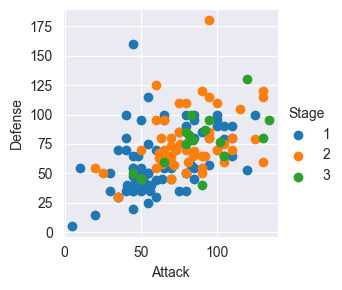

In [11]:
g = sns.FacetGrid(df, hue='Stage').map(plt.scatter, "Attack", "Defense").add_legend()

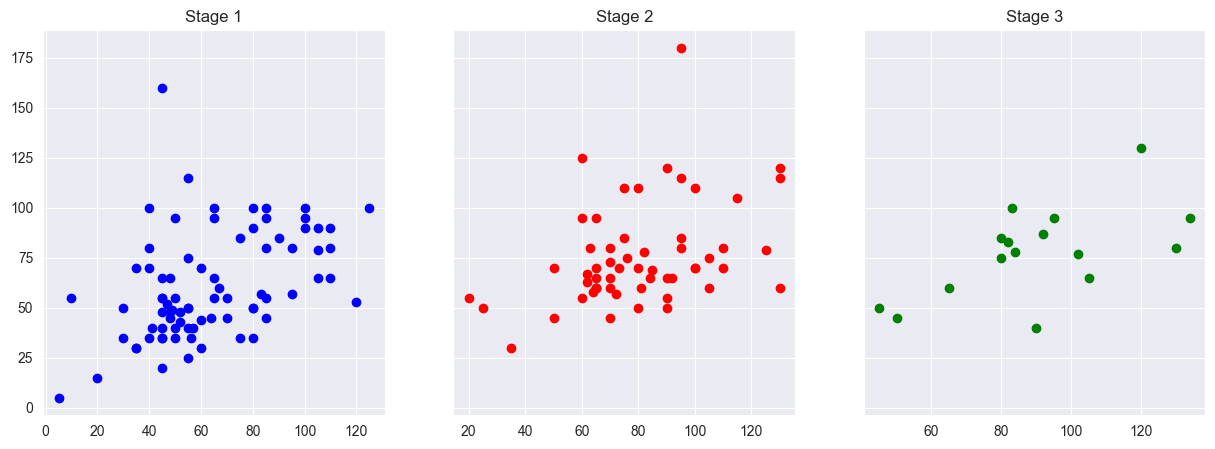

In [13]:
f, axis = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(15, 5))

axis[0].set_title("Stage 1")
axis[1].set_title("Stage 2")
axis[2].set_title("Stage 3")

axis[0].scatter(df.loc[df['Stage'] == 1, 'Attack'], df.loc[df['Stage'] == 1, 'Defense'],  c='b')
axis[1].scatter(df.loc[df['Stage'] == 2, 'Attack'], df.loc[df['Stage'] == 2, 'Defense'],  c='r')
axis[2].scatter(df.loc[df['Stage'] == 3, 'Attack'], df.loc[df['Stage'] == 3, 'Defense'],  c='g')

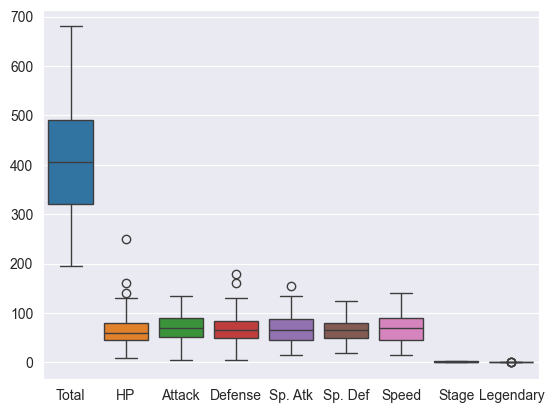

In [14]:
g = sns.boxplot(data=df)

<Axes: >

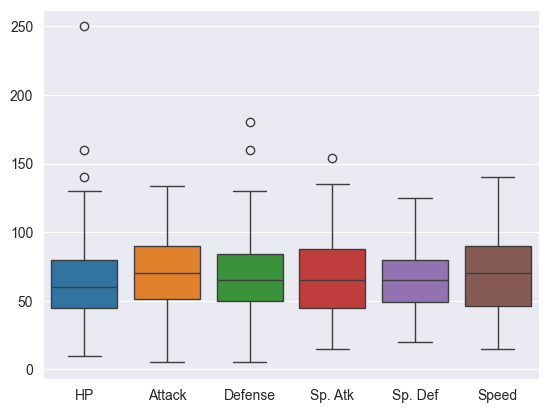

In [16]:
sns.boxplot(data=df.drop(['Total', 'Stage', 'Legendary'], axis=1))

In [19]:
corr = df.drop(['Total', 'Stage', 'Legendary', 'Name', 'Type 1', 'Type 2'], axis=1).corr()
corr

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
HP,1.000000,0.306768,0.119782,0.236649,0.490978,-0.040939
Attack,0.306768,1.000000,0.491965,0.146312,0.369069,0.194701
Defense,0.119782,0.491965,1.000000,0.187569,0.139912,-0.053252
Sp. Atk,0.236649,0.146312,0.187569,1.000000,0.522907,0.411516
Sp. Def,0.490978,0.369069,0.139912,0.522907,1.000000,0.392656
Speed,-0.040939,0.194701,-0.053252,0.411516,0.392656,1.000000


<Axes: >

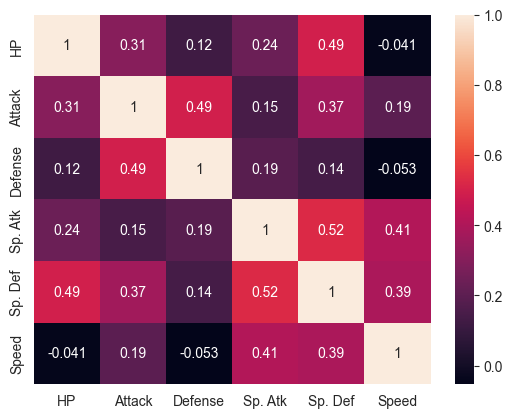

In [22]:
sns.heatmap(corr, annot=True)